In [2]:
# Load required modules
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import os
import xarray as xr
import pandas as pd
from tqdm import tqdm

#### Tara_BMN_Cleaned.csv

In [3]:
df = pd.read_csv(
        "/Users/annaolsen/Desktop/Speciale/DS_thesis/data/Tara_BMN_Cleaned.csv")

print(df.shape)

df = df.dropna(subset=['Longitude', 'Latitude'])

print(df.shape)

(34776, 94)
(34717, 94)


#### TARA_SST_locations_XYZ.csv

In [46]:
# df_TARA = pd.read_csv("/Volumes/PortableSSD/Speciale/SST/SST_daily/Tara_SST_locations_XYZ.csv")
df_TARA = pd.read_csv("/Users/annaolsen/Desktop/Tara_SST_locations_XYZ.csv")

print(df_TARA.shape)
# print(df_TARA.head())

df_TARA['location'] = list(zip(df_TARA['lat'], df_TARA['lon']))

# Convert the "date" column to datetime format
df_TARA['Date'] = pd.to_datetime(df_TARA['Date'])

print(df_TARA.head())

(34717, 8)
         Sample ID  Latitude  Longitude  Sea Surface Temp       Date  \
0  TARA_A100000004   39.9100    12.8266         20.559598 2009-10-20   
1  TARA_A100000005   39.9100    12.8266         20.559598 2009-10-20   
2  TARA_A100000008   39.9100    12.8266         20.559598 2009-10-20   
3  TARA_A100000009   39.9100    12.8266         20.559598 2009-10-20   
4  TARA_A100000022   39.8989    12.9034         20.530829 2009-10-20   

           OS region     lat     lon          location  
0  Mediterranean Sea  39.875  12.875  (39.875, 12.875)  
1  Mediterranean Sea  39.875  12.875  (39.875, 12.875)  
2  Mediterranean Sea  39.875  12.875  (39.875, 12.875)  
3  Mediterranean Sea  39.875  12.875  (39.875, 12.875)  
4  Mediterranean Sea  39.875  12.875  (39.875, 12.875)  


#### merged_SST_1981_2013.csv

In [7]:
df_sst = pd.read_csv("/Volumes/PortableSSD/Speciale/SST/SST_daily/SST_subsets/merged_SST_1981_2013.csv")

print(df_sst.head())
print(df_sst.shape)

      lon     lat        date       temp
0  12.875  39.875  1981-09-01  24.449999
1  12.875  39.875  1981-09-02  24.680000
2  12.875  39.875  1981-09-03  24.840000
3  12.875  39.875  1981-09-04  24.600000
4  12.875  39.875  1981-09-05  24.400000
(6554550, 4)


#### mhws_info_XYZ.csv

In [4]:
# df_mhws = pd.read_csv("/Volumes/PortableSSD/Speciale/SST/SST_daily/SST_subsets/mhws_info_XYZ.csv")
df_mhws = pd.read_csv("/Users/annaolsen/Desktop/mhws_info_XYZ.csv")

print(df_mhws.head())
print(df_mhws.shape)

# df_mhws.sort_values(by='date_end')
# print(df_mhws.tail())


   time_start  time_end  time_peak  date_start    date_end   date_peak  \
0      723641    723646     723643  1982-04-06  1982-04-11  1982-04-08   
1      723812    723825     723816  1982-09-24  1982-10-07  1982-09-28   
2      723914    723918     723917  1983-01-04  1983-01-08  1983-01-07   
3      724121    724125     724122  1983-07-30  1983-08-03  1983-07-31   
4      724622    724626     724624  1984-12-12  1984-12-16  1984-12-14   

   index_start  index_end  index_peak  duration  ...  \
0          217        222         219         6  ...   
1          388        401         392        14  ...   
2          490        494         493         5  ...   
3          697        701         698         5  ...   
4         1198       1202        1200         5  ...   

   intensity_cumulative_relThresh  intensity_max_abs  intensity_mean_abs  \
0                        1.963583              16.48           16.305000   
1                        4.067099              25.58           24.

#### MHWs from 2009-2013 
(mhws_info_XYZ.csv)

In [10]:
# Convert the "date" columns to datetime format
df_mhws['date_start'] = pd.to_datetime(df_mhws['date_start'])
df_mhws['date_end'] = pd.to_datetime(df_mhws['date_end'])

# Subset the DataFrame based on the condition
subset_df = df_mhws[(df_mhws['date_start'].dt.year >= 2009) & (df_mhws['date_start'].dt.year <= 2013)]

# Print the subset DataFrame
print(subset_df.head())
print(subset_df.shape)

    time_start  time_end  time_peak date_start   date_end   date_peak  \
49      733424    733432     733431 2009-01-17 2009-01-25  2009-01-24   
50      733534    733541     733539 2009-05-07 2009-05-14  2009-05-12   
51      733549    733558     733553 2009-05-22 2009-05-31  2009-05-26   
52      733572    733578     733573 2009-06-14 2009-06-20  2009-06-15   
53      733645    733658     733655 2009-08-26 2009-09-08  2009-09-05   

    index_start  index_end  index_peak  duration  ...  \
49        10000      10008       10007         9  ...   
50        10110      10117       10115         8  ...   
51        10125      10134       10129        10  ...   
52        10148      10154       10149         7  ...   
53        10221      10234       10231        14  ...   

    intensity_cumulative_relThresh  intensity_max_abs  intensity_mean_abs  \
49                        0.872612          15.219999           15.062222   
50                        5.621840          20.770000           

### Match....

In [53]:
from datetime import timedelta


# Convert date columns to datetime objects if they are not already
df_TARA['Date'] = pd.to_datetime(df_TARA['Date'])
subset_df['date_end'] = pd.to_datetime(subset_df['date_end'])
subset_df['date_peak'] = pd.to_datetime(subset_df['date_peak'])

# Convert the 'location' column to strings in both dataframes
df_TARA['location'] = df_TARA['location'].astype(str)
subset_df['location'] = subset_df['location'].astype(str)


# Merge dataframes based on location
merged_df = pd.merge(df_TARA, subset_df, on='location')

print("Merged DataFrame:")
print(merged_df.shape)

# Filter rows where date_end is within 30 days before "Date"
filtered_df = merged_df[(merged_df['date_peak'] >= (merged_df['Date'] - timedelta(days=30))) & (merged_df['date_peak'] <= merged_df['Date'])]

# Print or do whatever you want with the filtered_df dataframe
print("Filtered DataFrame:")
print(filtered_df.shape)

print(filtered_df.columns)

# filtered_df = filtered_df[['Date', 'date_start', 'date_end']]
# print(filtered_df)
print(filtered_df['category'].value_counts())
mhws_ids = set(filtered_df['Sample ID'])
tara_ids = set(df_TARA['Sample ID'])

no_mhws_ids = tara_ids - mhws_ids
print(len(no_mhws_ids))

no_mhws_df = df_TARA[df_TARA['Sample ID'].isin(no_mhws_ids)]

print(no_mhws_df.shape)

/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_44709/3272452346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['date_end'] = pd.to_datetime(subset_df['date_end'])
/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_44709/3272452346.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['date_peak'] = pd.to_datetime(subset_df['date_peak'])
/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_44709/3272452346.py:11: SettingWithCopyWarning: 
A value is trying to b

Merged DataFrame:
(488190, 39)
Filtered DataFrame:
(8737, 39)
Index(['Sample ID', 'Latitude', 'Longitude', 'Sea Surface Temp', 'Date',
       'OS region', 'lat', 'lon', 'location', 'time_start', 'time_end',
       'time_peak', 'date_start', 'date_end', 'date_peak', 'index_start',
       'index_end', 'index_peak', 'duration', 'duration_moderate',
       'duration_strong', 'duration_severe', 'duration_extreme',
       'intensity_max', 'intensity_mean', 'intensity_var',
       'intensity_cumulative', 'intensity_max_relThresh',
       'intensity_mean_relThresh', 'intensity_var_relThresh',
       'intensity_cumulative_relThresh', 'intensity_max_abs',
       'intensity_mean_abs', 'intensity_var_abs', 'intensity_cumulative_abs',
       'category', 'rate_onset', 'rate_decline', 'n_events'],
      dtype='object')
category
Moderate    7599
Strong      1138
Name: count, dtype: int64
27501
(27501, 9)


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_44709/362435713.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


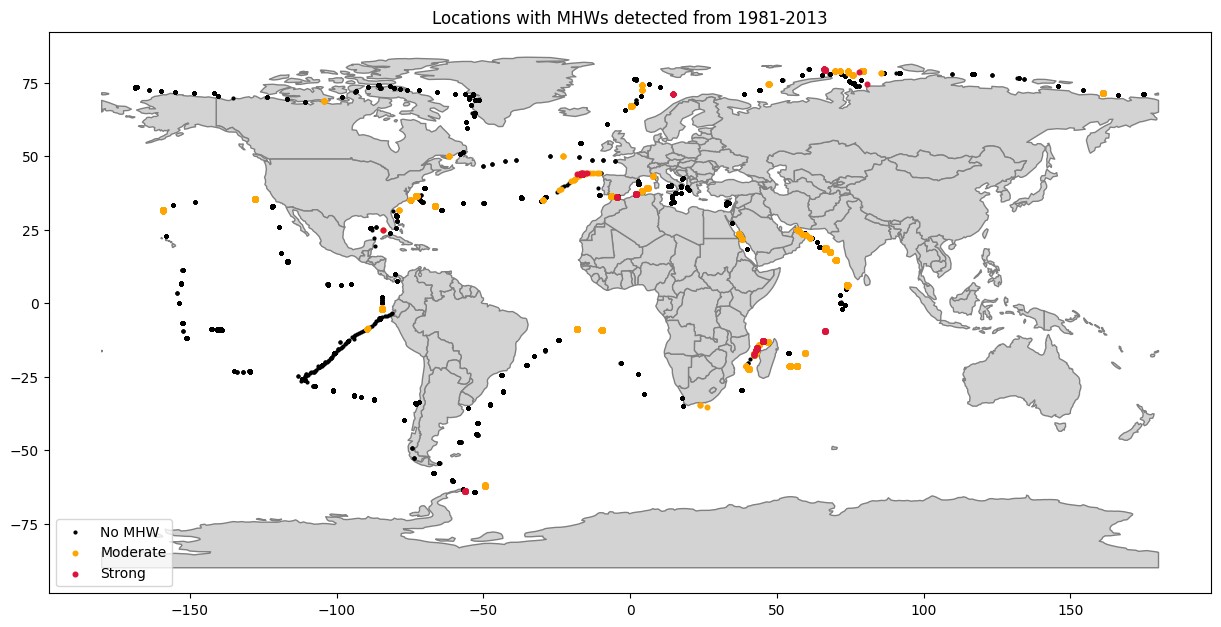

In [62]:
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


strong_df = filtered_df[filtered_df['category'] == 'Strong']
moderate_df = filtered_df[filtered_df['category'] == 'Moderate']


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 15))

# Plot world map
world.plot(ax=ax, color='lightgray', edgecolor='grey')

# Plot closest match points
ax.scatter(no_mhws_df['Longitude'], no_mhws_df['Latitude'],
           color='black', label='No MHW', s=4)

# Plot original points
ax.scatter(moderate_df['Longitude'], moderate_df['Latitude'],
           color='orange', label='Moderate', s=11)

# Plot closest match points
ax.scatter(strong_df['Longitude'], strong_df['Latitude'],
           color='crimson', label='Strong', s=11)



# Set title
ax.set_title('Locations with MHWs detected from 1981-2013')
# Add legend
ax.legend()

plt.show()
